In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
pd.set_option('display.max_columns', 500)

### reading in crisis1

In [2]:
#https://stackoverflow.com/questions/26521266/using-pandas-to-pd-read-excel-for-multiple-worksheets-of-the-same-workbook
crisis1 = pd.ExcelFile('../data/NSSCrisisv.1.xlsx')

In [3]:
crisis1.sheet_names

['in']

In [4]:
crisis1 = crisis1.parse('in')

In [5]:
crisis1.head(20)

FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:57 AM.  \
0                                                                                              
1                                       CallReportNum                                          
2                                            96627022                                          
3                                            96626934                                          
4                                            96626654                                          
5                                            96626370                                          
6                                            96625909                                          
7                                            96625698                                          
8                                            96625344                                          
9                                            96625140                                          
10                                           96625118                                          
11                                           96624680                                          
12                                           96624371                                          
13                                           96624091                                          
14                                           96623850                                          
15                                           96623713                                          
16                                           96623403                                          
17                                           96622500                                          
18                                           96622241                                          
19                                           96621605                                          

       Unnamed: 1             Unnamed: 2            Unnamed: 3  \
0             NaN                    NaN                   NaN   
1   ReportVersion  LinkedToCallReportNum  CallDateAndTimeStart   
2          Crisis                    NaN   2021-12-31 23:35:00   
3          Crisis                    NaN   2021-12-31 23:29:00   
4          Crisis                    NaN   2021-12-31 23:07:00   
5          Crisis                    NaN   2021-12-31 22:45:00   
6          Crisis                    NaN   2021-12-31 22:15:00   
7          Crisis                    NaN   2021-12-31 22:03:00   
8          Crisis                    NaN   2021-12-31 21:40:00   
9          Crisis                    NaN   2021-12-31 21:27:00   
10         Crisis                    NaN   2021-12-31 21:26:00   
11         Crisis                    NaN   2021-12-31 21:02:00   
12         Crisis                    NaN   2021-12-31 20:40:00   
13         Crisis                    NaN   2021-12-31 20:20:00   
14         Crisis                    NaN   2021-12-31 20:10:00   
15         Crisis                    NaN   2021-12-31 20:00:00   
16         Crisis                    NaN   2021-12-31 19:40:00   
17         Crisis                    NaN   2021-12-31 19:00:00   
18         Crisis                    NaN   2021-12-31 18:35:00   
19         Crisis                    NaN   2021-12-31 18:20:00   

             Unnamed: 4  Unnamed: 5 Unnamed: 6      Unnamed: 7  \
0                   NaN         NaN        NaN             NaN   
1    CallDateAndTimeEnd  CallLength  CallerNum  PhoneWorkerNum   
2   2021-12-31 23:58:00          23         -1          136748   
3   2021-12-31 23:35:00           6         -1          136748   
4   2021-12-31 23:28:00          21    1030262          136748   
5   2021-12-31 22:55:00          10    2479348          136748   
6   2021-12-31 22:44:00          29         -1          136748   
7   2021-12-31 22:15:00          12         -1          136748   
8   2

In [6]:
crisis1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52878 entries, 0 to 52877
Columns: 312 entries, FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:57 AM. to Unnamed: 311
dtypes: object(312)
memory usage: 125.9+ MB


### cleaning up crisis1

#drop columns with ALL NaN values
#https://datatofish.com/drop-columns-with-nan/
crisis1 = crisis1.dropna(axis=1, how ='all')
crisis1 = crisis1.dropna(axis=0, how='all')
crisis1.head()

In [7]:
#trim all whitespace
#https://stackoverflow.com/questions/33788913/pythonic-efficient-way-to-strip-whitespace-from-every-pandas-data-frame-cell-tha
crisis1 = crisis1.apply(lambda x: x.str.strip() if x.dtype == "str" else x)

In [8]:
#replace column names with row1 values
#https://www.adamsmith.haus/python/answers/how-to-convert-a-pandas-dataframe-row-to-column-headers-in-python
header_row = 1
crisis1.columns = crisis1.iloc[header_row]
crisis1.head()

1  CallReportNum  ReportVersion  LinkedToCallReportNum  CallDateAndTimeStart  \
0                           NaN                    NaN                   NaN   
1  CallReportNum  ReportVersion  LinkedToCallReportNum  CallDateAndTimeStart   
2       96627022         Crisis                    NaN   2021-12-31 23:35:00   
3       96626934         Crisis                    NaN   2021-12-31 23:29:00   
4       96626654         Crisis                    NaN   2021-12-31 23:07:00   

1   CallDateAndTimeEnd  CallLength  CallerNum  PhoneWorkerNum  \
0                  NaN         NaN        NaN             NaN   
1   CallDateAndTimeEnd  CallLength  CallerNum  PhoneWorkerNum   
2  2021-12-31 23:58:00          23         -1          136748   
3  2021-12-31 23:35:00           6         -1          136748   
4  2021-12-31 23:28:00          21    1030262          136748   

1  PhoneWorkerName  WasRealCall  WasHangup  WasSexCall  WasWrongNumber  \
0              NaN          NaN        NaN         NaN             NaN   
1  PhoneWorkerName  WasRealCall  WasHangup  WasSexCall  WasWrongNumber   
2    Lisa Crawford          NaN        NaN         NaN             NaN   
3    Lisa Crawford          NaN        NaN         NaN             NaN   
4    Lisa Crawford          NaN        NaN         NaN             NaN   

1  WasPrankCall  WasSilentCall  GeoCode  GeoAssignment  PostalCode  \
0           NaN            NaN      NaN            NaN         NaN   
1  WasPrankCall  WasSilentCall  GeoCode  GeoAssignment  PostalCode   
2           NaN            NaN      NaN            NaN         NaN   
3           NaN            NaN      NaN            NaN       37211   
4           NaN            NaN      NaN            NaN         NaN   

1  CensusDivision  CensusTrack  CensusReportingArea  211Region  \
0             NaN          NaN                  NaN        NaN   
1  CensusDivision  CensusTrack  CensusReportingArea  211Region   
2             NaN          NaN                  NaN        NaN   
3             NaN          NaN                  NaN        NaN   
4             NaN          NaN                  NaN        NaN   

1  PhoneExtension  PhoneType  ThirdPartyName  ThirdPartyOrganization  \
0             NaN        NaN             NaN                     NaN   
1  PhoneExtension  PhoneType  ThirdPartyName  ThirdPartyOrganization   
2             NaN        NaN             NaN                     NaN   
3             NaN        NaN             NaN                     NaN   
4             NaN        NaN             NaN                     NaN   

1  ThirdPartyPhoneNumber  ThirdPartyAddress  ThirdPartyCity  ThirdPartyCounty  \
0                    NaN                NaN             NaN               NaN   
1  ThirdPartyPhoneNumber  ThirdPartyAddress  ThirdPartyCity  ThirdPartyCounty   
2                    NaN                NaN             NaN               NaN   
3                    NaN                NaN             NaN               NaN   
4                    NaN                NaN             NaN               NaN   

1  ThirdPartyStateProvince  ThirdPartyPostalCode  \
0                      NaN                   NaN   
1  ThirdPartyStateProvince  ThirdPartyPostalCode   
2                      NaN                   NaN   
3                       TN                   NaN   
4                       TN                   NaN   

1                                          Narrative  VolunteerComments  \
0                                                NaN                NaN   
1                                          Narrative  VolunteerComments   
2  S: Caller says that he is lonely, he broke up ...                NaN   
3  S: Caller says he is disappointed because his ...                NaN   
4  S: Caller stated that she is tired and had to ...                NaN   

1                                 Feedback  CallersFeedback  TextField2  \
0                                      NaN              NaN         NaN   
1                              

In [9]:
crisis1 = crisis1.drop(header_row)
crisis1 = crisis1.reset_index(drop=True)
crisis1.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0                         NaN                   NaN                  NaN   
1      96627022        Crisis                   NaN  2021-12-31 23:35:00   
2      96626934        Crisis                   NaN  2021-12-31 23:29:00   
3      96626654        Crisis                   NaN  2021-12-31 23:07:00   
4      96626370        Crisis                   NaN  2021-12-31 22:45:00   

1   CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum PhoneWorkerName  \
0                  NaN        NaN       NaN            NaN             NaN   
1  2021-12-31 23:58:00         23        -1         136748   Lisa Crawford   
2  2021-12-31 23:35:00          6        -1         136748   Lisa Crawford   
3  2021-12-31 23:28:00         21   1030262         136748   Lisa Crawford   
4  2021-12-31 22:55:00         10   2479348         136748   Lisa Crawford   

1 WasRealCall WasHangup WasSexCall WasWrongNumber WasPrankCall WasSilentCall  \
0         NaN       NaN        NaN            NaN          NaN           NaN   
1         NaN       NaN        NaN            NaN          NaN           NaN   
2         NaN       NaN        NaN            NaN          NaN           NaN   
3         NaN       NaN        NaN            NaN          NaN           NaN   
4         NaN       NaN        NaN            NaN          NaN           NaN   

1 GeoCode GeoAssignment PostalCode CensusDivision CensusTrack  \
0     NaN           NaN        NaN            NaN         NaN   
1     NaN           NaN        NaN            NaN         NaN   
2     NaN           NaN      37211            NaN         NaN   
3     NaN           NaN        NaN            NaN         NaN   
4     NaN           NaN      37098            NaN         NaN   

1 CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
0                 NaN       NaN            NaN       NaN            NaN   
1                 NaN       NaN            NaN       NaN            NaN   
2                 NaN       NaN            NaN       NaN            NaN   
3                 NaN       NaN            NaN       NaN            NaN   
4                 NaN       NaN            NaN       NaN            NaN   

1 ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
0                    NaN                   NaN               NaN   
1                    NaN                   NaN               NaN   
2                    NaN                   NaN               NaN   
3                    NaN                   NaN               NaN   
4                    NaN                   NaN               NaN   

1 ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
0            NaN              NaN                     NaN   
1            NaN              NaN                     NaN   
2            NaN              NaN                      TN   
3            NaN              NaN                      TN   
4            NaN              NaN                      TN   

1 ThirdPartyPostalCode                                          Narrative  \
0                  NaN                                                NaN   
1                  NaN  S: Caller says that he is lonely, he broke up ...   
2                  NaN  S: Caller says he is disappointed because his ...   
3                  NaN  S: Caller stated that she is tired and had to ...   
4                  NaN  S: Caller stated that she fell and broke her r...   

1 VolunteerComments                                 Feedback CallersFeedback  \
0               NaN                                      NaN             NaN   
1               NaN  (No feedback was needed for this call.)             NaN   
2               NaN  (No feedback was needed for this call.)             NaN   
3               NaN                                      NaN             NaN   
4               NaN                                      NaN             NaN   

1 TextField2 TextField3 TextFie

In [10]:
crisis1.tail()

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
52872      69492892        Crisis                   NaN  2020-01-01 05:14:00   
52873      69492741        Crisis                   NaN  2020-01-01 04:45:00   
52874      69492019        Crisis                   NaN  2020-01-01 03:00:00   
52875      69492070        Crisis                   NaN  2020-01-01 01:45:00   
52876      69492055        Crisis                   NaN  2020-01-01 00:04:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
52872  2020-01-01 05:28:00         14   1029822         101461   
52873  2020-01-01 05:05:00         20        -1         101461   
52874  2020-01-01 03:18:00         18        -1         101461   
52875  2020-01-01 01:49:00          4        -1         101461   
52876  2020-01-01 00:05:00          1        -1         101461   

1     PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
52872   Rachel Bailey         NaN       NaN        NaN            NaN   
52873   Rachel Bailey         NaN       NaN        NaN            NaN   
52874   Rachel Bailey         NaN       NaN        NaN            NaN   
52875   Rachel Bailey         NaN       NaN        NaN            NaN   
52876   Rachel Bailey         NaN       NaN        NaN            NaN   

1     WasPrankCall WasSilentCall GeoCode GeoAssignment PostalCode  \
52872          NaN           NaN     NaN           NaN      37138   
52873          NaN           NaN     NaN           NaN        NaN   
52874          NaN           NaN     NaN           NaN        NaN   
52875          NaN           NaN     NaN           NaN        NaN   
52876          NaN           NaN     NaN           NaN        NaN   

1     CensusDivision CensusTrack CensusReportingArea 211Region PhoneExtension  \
52872            NaN         NaN                 NaN       NaN            NaN   
52873            NaN         NaN                 NaN       NaN            NaN   
52874            NaN         NaN                 NaN       NaN            NaN   
52875            NaN         NaN                 NaN       NaN            NaN   
52876            NaN         NaN                 NaN       NaN            NaN   

1     PhoneType ThirdPartyName ThirdPartyOrganization ThirdPartyPhoneNumber  \
52872       NaN            NaN                    NaN                   NaN   
52873       NaN            NaN                    NaN                   NaN   
52874       NaN            NaN                    NaN                   NaN   
52875       NaN            NaN                    NaN                   NaN   
52876       NaN            NaN                    NaN                   NaN   

1     ThirdPartyAddress ThirdPartyCity ThirdPartyCounty  \
52872               NaN            NaN              NaN   
52873               NaN            NaN              NaN   
52874               NaN            NaN              NaN   
52875               NaN            NaN              NaN   
52876               NaN            NaN              NaN   

1     ThirdPartyStateProvince ThirdPartyPostalCode  \
52872                      TN                  NaN   
52873                     NaN                  NaN   
52874                     NaN                  NaN   
52875                     NaN                  NaN   
52876                     NaN                  NaN   

1                                              Narrative VolunteerComments  \
52872  S- caller reported fear over evictionO- male, ...               NaN   
52873  S- caller reported depression and anxiety. Rep...               NaN   
52874  S- caller reported it was a hard holiday and h...               NaN   
52875  S- caller made inappropriate noises and kept a...               NaN   
52876                                                NaN               NaN   

1                                     Feedback CallersFeedback TextField2  \
52872                                      NaN             NaN        NaN   
528

### reading in crisis2

In [11]:
crisis2 = pd.ExcelFile('../data/NSSCrisisv.2.xlsx')

In [12]:
crisis2.sheet_names

['in']

In [13]:
crisis2 = crisis2.parse('in')

In [14]:
crisis2.head(20)

FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:58 AM.  \
0                                                                                              
1                                       CallReportNum                                          
2                                         101384892.0                                          
3                                         101384348.0                                          
4                                         101383635.0                                          
5                                         101383441.0                                          
6                                         101383414.0                                          
7                                         101383042.0                                          
8                                         101382889.0                                          
9                                         101382710.0                                          
10                                        101382566.0                                          
11                                        101382530.0                                          
12                                        101381988.0                                          
13                                        101381436.0                                          
14                                        101381250.0                                          
15                                        101381168.0                                          
16                                        101380882.0                                          
17                                        101380792.0                                          
18                                        101381654.0                                          
19                                        101380604.0                                          

                 Unnamed: 1             Unnamed: 2            Unnamed: 3  \
0                       NaN                    NaN                   NaN   
1             ReportVersion  LinkedToCallReportNum  CallDateAndTimeStart   
2                Crisis v.2                    NaN   2022-04-30 23:19:00   
3                Crisis v.2                    NaN   2022-04-30 22:46:00   
4                Crisis v.2                    NaN   2022-04-30 22:03:00   
5                Crisis v.2                    NaN   2022-04-30 21:52:00   
6                Crisis v.2                    NaN   2022-04-30 21:50:00   
7                Crisis v.2                    NaN   2022-04-30 21:30:00   
8                Crisis v.2                    NaN   2022-04-30 21:19:00   
9                Crisis v.2                    NaN   2022-04-30 21:13:00   
10               Crisis v.2                    NaN   2022-04-30 21:05:00   
11               Crisis v.2                    NaN   2022-04-30 21:02:00   
12               Crisis v.2                    NaN   2022-04-30 20:36:00   
13               Crisis v.2                    NaN   2022-04-30 20:05:00   
14               Crisis v.2                    NaN   2022-04-30 19:59:00   
15               Crisis v.2                    NaN   2022-04-30 19:55:00   
16               Crisis v.2                    NaN   2022-04-30 19:41:00   
17               Crisis v.2                    NaN   2022-04-30 19:37:00   
18  Suicide Risk Assessment                    Yes   2022-04-30 19:26:00   
19               Crisis v.2                    NaN   2022-04-30 19:26:00   

             Unnamed: 4  Unnamed: 5 Unnamed: 6      Unnamed: 7  \
0                   NaN         NaN        NaN             NaN   
1    CallDateAndTimeEnd  CallLength  CallerNum  PhoneWorkerNum   
2   2022-04-30 23:27:00         8.0  1025380.0         55599.0   
3   2022-04-30 23:13:00        27.0       -1.0         55599.0   
4   2022-04-30 22:27:00        24.0       -1.0        16906

In [15]:
crisis2.tail()

FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:58 AM.  \
10645                                         96673255.0                                          
10646                                         96645142.0                                          
10647                                         96640741.0                                          
10648                                         96849680.0                                          
10649                                         97267704.0                                          

                      Unnamed: 1 Unnamed: 2           Unnamed: 3  \
10645  Homicidal Risk Assessment        Yes  2022-01-01 20:34:00   
10646    Suicide Risk Assessment        Yes  2022-01-01 18:27:00   
10647    Suicide Risk Assessment        Yes  2022-01-01 14:44:00   
10648                 Crisis v.2        NaN  2022-01-01 12:09:00   
10649    Suicide Risk Assessment        Yes  2022-01-01 02:30:00   

                Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7       Unnamed: 8  \
10645  2022-01-01 20:58:00       24.0       -1.0   166157.0   Tasia Thompson   
10646  2022-01-01 19:12:00       45.0       -1.0   166157.0   Tasia Thompson   
10647  2022-01-01 15:19:00       35.0       -1.0   136748.0    Lisa Crawford   
10648  2022-01-01 12:10:00        1.0       -1.0    53133.0  Shannon Huffman   
10649  2022-01-01 03:10:00       40.0       -1.0   169061.0   Tandra Freeman   

      Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
10645        NaN         NaN         NaN         NaN         NaN         NaN   
10646        NaN         NaN         NaN         NaN         NaN         NaN   
10647        NaN         NaN         NaN         NaN         NaN         NaN   
10648        NaN         NaN         NaN         NaN         NaN         NaN   
10649        NaN         NaN         NaN         NaN         NaN         NaN   

      Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18    Unnamed: 19  \
10645         NaN         NaN    Davidson          TN  United States   
10646         NaN         NaN    Davidson          TN  United States   
10647         NaN         NaN         NaN          TN            NaN   
10648         NaN         NaN         NaN         NaN            NaN   
10649         NaN         NaN         NaN          TN            NaN   

      Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25  \
10645     37072.0         NaN         NaN         NaN         NaN         NaN   
10646     37208.0         NaN         NaN         NaN         NaN         NaN   
10647         NaN         NaN         NaN         NaN         NaN         NaN   
10648         NaN         NaN         NaN         NaN         NaN         NaN   
10649         NaN         NaN         NaN         NaN         NaN         NaN   

      Unnamed: 26 Unnamed: 27 Unnamed: 28 Unnamed: 29 Unnamed: 30 Unnamed: 31  \
10645         NaN         NaN         NaN         NaN         NaN         NaN   
10646         NaN         NaN         NaN         NaN         NaN         NaN   
10647         NaN         NaN         NaN         NaN         NaN         NaN   
10648         NaN         NaN         NaN         NaN         NaN         NaN   
10649         NaN         NaN         NaN         NaN         NaN         NaN   

      Unnamed: 32 Unnamed: 33 Unnamed: 34  \
10645         NaN          TN         NaN   
10646         NaN          TN         NaN   
10647         NaN         NaN         NaN   
10648         NaN         NaN         NaN   
10649         NaN         NaN         NaN   

                                             Unnamed: 35 Unnamed: 36  \
10645  Caller was calling because he was wanting to k...         NaN   
10646                                                NaN         NaN   
10647                                                NaN         NaN   
10648                                                NaN         NaN   
10

In [16]:
crisis2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10650 entries, 0 to 10649
Columns: 261 entries, FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:58 AM. to Unnamed: 260
dtypes: object(261)
memory usage: 21.2+ MB


### cleaning up crisis2

In [17]:
#drop columns with ALL NaN values
#https://datatofish.com/drop-columns-with-nan/
crisis2 = crisis2.dropna(axis=1, how ='all')
crisis2 = crisis2.dropna(axis=0, how='all')
crisis2.head()

FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:58 AM.  \
0                                                                                             
1                                      CallReportNum                                          
2                                        101384892.0                                          
3                                        101384348.0                                          
4                                        101383635.0                                          

      Unnamed: 1             Unnamed: 2            Unnamed: 3  \
0            NaN                    NaN                   NaN   
1  ReportVersion  LinkedToCallReportNum  CallDateAndTimeStart   
2     Crisis v.2                    NaN   2022-04-30 23:19:00   
3     Crisis v.2                    NaN   2022-04-30 22:46:00   
4     Crisis v.2                    NaN   2022-04-30 22:03:00   

            Unnamed: 4  Unnamed: 5 Unnamed: 6      Unnamed: 7  \
0                  NaN         NaN        NaN             NaN   
1   CallDateAndTimeEnd  CallLength  CallerNum  PhoneWorkerNum   
2  2022-04-30 23:27:00         8.0  1025380.0         55599.0   
3  2022-04-30 23:13:00        27.0       -1.0         55599.0   
4  2022-04-30 22:27:00        24.0       -1.0        169061.0   

        Unnamed: 8   Unnamed: 9 Unnamed: 10 Unnamed: 11     Unnamed: 12  \
0              NaN          NaN         NaN         NaN             NaN   
1  PhoneWorkerName  WasRealCall   WasHangup  WasSexCall  WasWrongNumber   
2  Darren Anderson          NaN         NaN         NaN             NaN   
3  Darren Anderson          NaN         NaN         NaN             NaN   
4   Tandra Freeman          NaN         NaN         NaN             NaN   

    Unnamed: 13    Unnamed: 14 Unnamed: 15    Unnamed: 16 Unnamed: 17  \
0           NaN            NaN         NaN            NaN         NaN   
1  WasPrankCall  WasSilentCall     GeoCode  GeoAssignment  CountyName   
2           NaN            NaN         NaN            NaN   Robertson   
3           NaN            NaN         NaN            NaN       Smith   
4           NaN            NaN         NaN            NaN         NaN   

     Unnamed: 18    Unnamed: 19 Unnamed: 20     Unnamed: 21  Unnamed: 22  \
0            NaN            NaN         NaN             NaN          NaN   
1  StateProvince    CountryName  PostalCode  CensusDivision  CensusTrack   
2             TN  United States         NaN             NaN          NaN   
3             TN  United States     38563.0             NaN          NaN   
4            NaN            NaN         NaN             NaN          NaN   

           Unnamed: 23 Unnamed: 24     Unnamed: 25 Unnamed: 26  \
0                  NaN         NaN             NaN         NaN   
1  CensusReportingArea   211Region  PhoneExtension   PhoneType   
2                  NaN         NaN             NaN         NaN   
3                  NaN         NaN             NaN         NaN   
4                  NaN         NaN             NaN         NaN   

      Unnamed: 27             Unnamed: 28            Unnamed: 29  \
0             NaN                     NaN                    NaN   
1  ThirdPartyName  ThirdPartyOrganization  ThirdPartyPhoneNumber   
2             NaN                     NaN                    NaN   
3             NaN                     NaN                    NaN   
4             NaN                     NaN                    NaN   

         Unnamed: 30     Unnamed: 31       Unnamed: 32  \
0                NaN             NaN               NaN   
1  ThirdPartyAddress  ThirdPartyCity  ThirdPartyCounty   
2                NaN             NaN               NaN   
3                NaN             NaN               NaN   
4                NaN             NaN               NaN   

               Unnamed: 33           Unnamed: 34 Unnamed: 35  \
0                      NaN                   NaN         NaN   
1  ThirdPartyStateP

In [18]:
#trim all whitespace
#https://stackoverflow.com/questions/33788913/pythonic-efficient-way-to-strip-whitespace-from-every-pandas-data-frame-cell-tha
crisis2 = crisis2.apply(lambda x: x.str.strip() if x.dtype == "str" else x)

In [19]:
#replace column names with row1 values
#https://www.adamsmith.haus/python/answers/how-to-convert-a-pandas-dataframe-row-to-column-headers-in-python
crisis2.columns = crisis2.iloc[header_row]
crisis2 = crisis2.drop(header_row)
crisis2 = crisis2.reset_index(drop=True)
crisis2.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0                         NaN                   NaN                  NaN   
1   101384892.0    Crisis v.2                   NaN  2022-04-30 23:19:00   
2   101384348.0    Crisis v.2                   NaN  2022-04-30 22:46:00   
3   101383635.0    Crisis v.2                   NaN  2022-04-30 22:03:00   
4   101383441.0    Crisis v.2                   NaN  2022-04-30 21:52:00   

1   CallDateAndTimeEnd CallLength  CallerNum PhoneWorkerNum  PhoneWorkerName  \
0                  NaN        NaN        NaN            NaN              NaN   
1  2022-04-30 23:27:00        8.0  1025380.0        55599.0  Darren Anderson   
2  2022-04-30 23:13:00       27.0       -1.0        55599.0  Darren Anderson   
3  2022-04-30 22:27:00       24.0       -1.0       169061.0   Tandra Freeman   
4  2022-04-30 22:15:00       23.0       -1.0       170047.0       Jane Davis   

1 WasRealCall WasHangup WasSexCall WasWrongNumber WasPrankCall WasSilentCall  \
0         NaN       NaN        NaN            NaN          NaN           NaN   
1         NaN       NaN        NaN            NaN          NaN           NaN   
2         NaN       NaN        NaN            NaN          NaN           NaN   
3         NaN       NaN        NaN            NaN          NaN           NaN   
4         NaN       NaN        NaN            NaN          NaN           NaN   

1 GeoCode GeoAssignment CountyName StateProvince    CountryName PostalCode  \
0     NaN           NaN        NaN           NaN            NaN        NaN   
1     NaN           NaN  Robertson            TN  United States        NaN   
2     NaN           NaN      Smith            TN  United States    38563.0   
3     NaN           NaN        NaN           NaN            NaN        NaN   
4     NaN           NaN        NaN           NaN            NaN        NaN   

1 CensusDivision CensusTrack CensusReportingArea 211Region PhoneExtension  \
0            NaN         NaN                 NaN       NaN            NaN   
1            NaN         NaN                 NaN       NaN            NaN   
2            NaN         NaN                 NaN       NaN            NaN   
3            NaN         NaN                 NaN       NaN            NaN   
4            NaN         NaN                 NaN       NaN            NaN   

1 PhoneType ThirdPartyName ThirdPartyOrganization ThirdPartyPhoneNumber  \
0       NaN            NaN                    NaN                   NaN   
1       NaN            NaN                    NaN                   NaN   
2       NaN            NaN                    NaN                   NaN   
3       NaN            NaN                    NaN                   NaN   
4       NaN            NaN                    NaN                   NaN   

1 ThirdPartyAddress ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
0               NaN            NaN              NaN                     NaN   
1               NaN            NaN              NaN                     NaN   
2               NaN            NaN              NaN                     NaN   
3               NaN            NaN              NaN                     NaN   
4               NaN            NaN              NaN                     NaN   

1 ThirdPartyPostalCode Narrative  \
0                  NaN       NaN   
1                  NaN       NaN   
2                  NaN       NaN   
3                  NaN       NaN   
4                  NaN       NaN   

1                                  VolunteerComments  \
0                                                NaN   
1  Client said she broke her wrist while coming i...   
2  Caller discussed having PTSD from complicated ...   
3  Caller has a conflict with family and friends....   
4  woman is disabled and has a TBI - thinks she c...   

1                                 Feedback CallersFeedback TextField2  \
0                                      NaN             NaN        NaN   
1                      

### reading in call_volume

In [20]:
#https://stackoverflow.com/questions/26521266/using-pandas-to-pd-read-excel-for-multiple-worksheets-of-the-same-workbook
call_volume = pd.ExcelFile('../data/Contact_center_call_volume_2020-2022.xlsx')
call_volume.sheet_names

['2020', '2021', '2022']

In [21]:
call_volume2020 = call_volume.parse('2020')

In [22]:
call_volume2021 = call_volume.parse('2021')

In [23]:
call_volume2022 = call_volume.parse('2022')

In [24]:
call_volume2020.head()

Report Info                                         Unnamed: 1 Unnamed: 2  \
0       Queue:  AWARE,Community Response,Crisis Eng,Crisis Eng...        NaN   
1          NaN            Crisis Spanish,Crisis Spanish PRIORITY,        NaN   
2          NaN     Lifeline,MHART,Pet Loss,REDLINE,Referral Line,        NaN   
3          NaN                                             SAMHSA        NaN   
4  Start Date:                                2020-01-01 00:00:00        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9 Unnamed: 10  
0        NaN         NaN  
1        NaN         NaN  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN

In [25]:
call_volume2021.head(20)

Report Info  \
0                                Queue:   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                           Start Date:   
5                             End Date:   
6                           Hour range:   
7                               Period:   
8                                   NaN   
9                           Total Calls   
10             Number of Received Calls   
11             Number of Answered Calls   
12  Number of Abandoned Unanswered Call   
13     Number of Other Unanswered Calls   
14          Number of Transferred Calls   
15                      Unanswered Rate   
16                         Abandon Rate   
17                          Agent Login   
18                         Agent Logoff   
19                                  NaN   

                                           Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0   AWARE,Community Response,Crisis Eng,Crisis Eng...        NaN        NaN   
1             Crisis Spanish,Crisis Spanish PRIORITY,        NaN        NaN   
2      Lifeline,MHART,Pet Loss,REDLINE,Referral Line,        NaN        NaN   
3                                              SAMHSA        NaN        NaN   
4                                 2021-01-01 00:00:00        NaN        NaN   
5                                 2021-12-31 00:00:00        NaN        NaN   
6                                       00:00 - 23:59        NaN        NaN   
7                                            365 days        NaN        NaN   
8                                                 NaN        NaN        NaN   
9                                                 NaN        NaN        NaN   
10                                        53975 calls        NaN        NaN   
11                                        37036 calls        NaN        NaN   
12                                        10841 calls        NaN        NaN   
13                                         5215 calls        NaN        NaN   
14                                          883 calls        NaN        NaN   
15                                             0.0966        NaN        NaN   
16                                             0.2009        NaN        NaN   
17                                              37571        NaN        NaN   
18                                              37534        NaN        NaN   
19                                                NaN        NaN        NaN   

   Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
0         NaN        NaN        NaN        NaN        NaN        NaN   
1         NaN        NaN        NaN        NaN        NaN        NaN   
2         NaN        NaN        NaN        NaN        NaN        NaN   
3         NaN        NaN        NaN        NaN        NaN        NaN   
4         NaN        NaN        NaN        NaN        NaN        NaN   
5         NaN        NaN        NaN        NaN        NaN        NaN   
6         NaN        NaN        NaN        NaN        NaN        NaN   
7         NaN        NaN        NaN        NaN        NaN        NaN   
8         NaN        NaN        NaN        NaN        NaN        NaN   
9         NaN        NaN        NaN        NaN        NaN        NaN   
10        NaN        NaN        NaN        NaN        NaN        NaN   
11        NaN        NaN        NaN        NaN        NaN        NaN   
12        NaN        NaN        NaN        NaN        NaN        NaN   
13        NaN        NaN        NaN        NaN        NaN        NaN   
14        NaN        NaN        NaN        NaN        NaN        NaN   
15        NaN        NaN        NaN        NaN        NaN        NaN   
16        NaN        NaN        NaN        NaN        NaN        NaN   
17        NaN        NaN        NaN        NaN        NaN        NaN   
18        NaN        NaN        NaN        NaN        NaN        NaN   
19        NaN        NaN

### combining crisis1 and crisis2

In [26]:
crisis = pd.concat([crisis2, crisis1])

In [27]:
crisis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63526 entries, 0 to 52876
Columns: 372 entries, CallReportNum to Transfer Information - Which line/agency transferred you to this Crisis Line?
dtypes: object(372)
memory usage: 180.8+ MB


In [28]:
crisis = crisis.reset_index(drop=True)
crisis.head(20)

1  CallReportNum            ReportVersion LinkedToCallReportNum  \
0                                     NaN                   NaN   
1    101384892.0               Crisis v.2                   NaN   
2    101384348.0               Crisis v.2                   NaN   
3    101383635.0               Crisis v.2                   NaN   
4    101383441.0               Crisis v.2                   NaN   
5    101383414.0               Crisis v.2                   NaN   
6    101383042.0               Crisis v.2                   NaN   
7    101382889.0               Crisis v.2                   NaN   
8    101382710.0               Crisis v.2                   NaN   
9    101382566.0               Crisis v.2                   NaN   
10   101382530.0               Crisis v.2                   NaN   
11   101381988.0               Crisis v.2                   NaN   
12   101381436.0               Crisis v.2                   NaN   
13   101381250.0               Crisis v.2                   NaN   
14   101381168.0               Crisis v.2                   NaN   
15   101380882.0               Crisis v.2                   NaN   
16   101380792.0               Crisis v.2                   NaN   
17   101381654.0  Suicide Risk Assessment                   Yes   
18   101380604.0               Crisis v.2                   NaN   
19   101380454.0               Crisis v.2                   NaN   

1  CallDateAndTimeStart   CallDateAndTimeEnd CallLength  CallerNum  \
0                   NaN                  NaN        NaN        NaN   
1   2022-04-30 23:19:00  2022-04-30 23:27:00        8.0  1025380.0   
2   2022-04-30 22:46:00  2022-04-30 23:13:00       27.0       -1.0   
3   2022-04-30 22:03:00  2022-04-30 22:27:00       24.0       -1.0   
4   2022-04-30 21:52:00  2022-04-30 22:15:00       23.0       -1.0   
5   2022-04-30 21:50:00  2022-04-30 21:51:00        1.0       -1.0   
6   2022-04-30 21:30:00  2022-04-30 21:31:00        1.0       -1.0   
7   2022-04-30 21:19:00  2022-04-30 21:28:00        9.0       -1.0   
8   2022-04-30 21:13:00  2022-04-30 21:27:00       14.0  2479348.0   
9   2022-04-30 21:05:00  2022-04-30 21:06:00        1.0  2479348.0   
10  2022-04-30 21:02:00  2022-04-30 21:03:00        1.0       -1.0   
11  2022-04-30 20:36:00  2022-04-30 21:09:00       33.0       -1.0   
12  2022-04-30 20:05:00  2022-04-30 20:20:00       15.0  1802329.0   
13  2022-04-30 19:59:00  2022-04-30 20:00:00        1.0       -1.0   
14  2022-04-30 19:55:00  2022-04-30 19:58:00        3.0       -1.0   
15  2022-04-30 19:41:00  2022-04-30 19:55:00       14.0       -1.0   
16  2022-04-30 19:37:00  2022-04-30 20:01:00       24.0       -1.0   
17  2022-04-30 19:26:00  2022-04-30 20:15:00       49.0       -1.0   
18  2022-04-30 19:26:00  2022-04-30 20:15:00       49.0       -1.0   
19  2022-04-30 19:20:00  2022-04-30 19:40:00       20.0       -1.0   

1  PhoneWorkerNum  PhoneWorkerName WasRealCall WasHangup WasSexCall  \
0             NaN              NaN         NaN       NaN        NaN   
1         55599.0  Darren Anderson         NaN       NaN        NaN   
2         55599.0  Darren Anderson         NaN       NaN        NaN   
3        169061.0   Tandra Freeman         NaN       NaN        NaN   
4        170047.0       Jane Davis         NaN       NaN        NaN   
5        169061.0   Tandra Freeman         NaN       NaN        NaN   
6        170047.0       Jane Davis         NaN       NaN        NaN   
7        170047.0       Jane Davis         NaN       NaN        NaN   
8        169061.0   Tandra Freeman         NaN       NaN        NaN   
9        169061.0   Tandra Freeman         NaN       NaN        NaN   
10       169061.0   Tandra Freeman         NaN       NaN        NaN   
11       170047.0       Jane Davis         NaN       NaN        NaN   
12       169061.0   Tandra Freeman         NaN       NaN        NaN   
13       158222.0  Lauren Williams         NaN       NaN        NaN   
14       158222.0  Lauren Williams         NaN       NaN

In [29]:
crisis.tail(20)

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
63506      69500775        Crisis                   NaN  2020-01-01 14:52:00   
63507      69500723        Crisis                   NaN  2020-01-01 14:46:00   
63508      69500031        Crisis                   NaN  2020-01-01 14:13:00   
63509      69499714        Crisis                   NaN  2020-01-01 13:57:00   
63510      69499671        Crisis                   NaN  2020-01-01 13:51:00   
63511      69499283        Crisis                   NaN  2020-01-01 13:32:00   
63512      69497499        Crisis                   NaN  2020-01-01 11:43:00   
63513      69497193        Crisis                   NaN  2020-01-01 11:25:00   
63514      69496076        Crisis                   NaN  2020-01-01 10:16:00   
63515      69495893        Crisis                   NaN  2020-01-01 09:57:00   
63516      69494693        Crisis                   NaN  2020-01-01 08:38:00   
63517      69494274        Crisis                   NaN  2020-01-01 07:58:00   
63518      69493902        Crisis                   NaN  2020-01-01 07:23:00   
63519      69493886        Crisis                   NaN  2020-01-01 07:22:00   
63520      69494315        Crisis                   NaN  2020-01-01 06:49:00   
63521      69492892        Crisis                   NaN  2020-01-01 05:14:00   
63522      69492741        Crisis                   NaN  2020-01-01 04:45:00   
63523      69492019        Crisis                   NaN  2020-01-01 03:00:00   
63524      69492070        Crisis                   NaN  2020-01-01 01:45:00   
63525      69492055        Crisis                   NaN  2020-01-01 00:04:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
63506  2020-01-01 14:57:00          5        -1          92180   
63507  2020-01-01 14:48:00          2        -1          55555   
63508  2020-01-01 14:23:00         10   1155260          55555   
63509  2020-01-01 14:17:00         20   1314449          92180   
63510  2020-01-01 13:55:00          4        -1          55555   
63511  2020-01-01 13:44:00         12   1033354         135130   
63512  2020-01-01 11:51:00          8   1025380         135130   
63513  2020-01-01 11:39:00         14        -1         135130   
63514  2020-01-01 10:27:00         11        -2          62042   
63515  2020-01-01 10:01:00          4        -1          62042   
63516  2020-01-01 09:01:00         23   1031947          62042   
63517  2020-01-01 08:03:00          5        -1          62042   
63518  2020-01-01 07:24:00          1        -1          62042   
63519  2020-01-01 07:23:00          1        -1          62042   
63520  2020-01-01 06:55:00          6        -1          62042   
63521  2020-01-01 05:28:00         14   1029822         101461   
63522  2020-01-01 05:05:00         20        -1         101461   
63523  2020-01-01 03:18:00         18        -1         101461   
63524  2020-01-01 01:49:00          4        -1         101461   
63525  2020-01-01 00:05:00          1        -1         101461   

1     PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
63506       Vann Wood         NaN       NaN        NaN            NaN   
63507   Joan VanReece         NaN       NaN        NaN            NaN   
63508   Joan VanReece         NaN       NaN        NaN            NaN   
63509       Vann Wood         NaN       NaN        NaN            NaN   
63510   Joan VanReece         NaN       NaN        NaN            NaN   
63511   Lakeisha Read         NaN       NaN        NaN            NaN   
63512   Lakeisha Read         NaN       NaN        NaN            NaN   
63513   Lakeisha Read         NaN       NaN        NaN            NaN   
63514    Sherika Sims         NaN       NaN        NaN            NaN   
63515    Sherika Sims         NaN       NaN        NaN            NaN   
63516    Sherika Sims         NaN       NaN        NaN            NaN   
63517    Sherika Sims         NaN       NaN        NaN  

In [30]:
crisis.shape

(63526, 372)

## 1. Examine call volume and identify surge times, seasons, or events.

### Ideas: 2021 vs 2022, avg call volume per month, avg call volume per day of the. month

In [31]:
crisis['CallDateAndTimeStart'].dtype

dtype('O')

In [32]:
print(type(crisis['CallDateAndTimeStart']))

<class 'pandas.core.series.Series'>


In [33]:
#this really won't work since the time is included - let's get a column w/ just the date
crisis['CallDateAndTimeStart'].value_counts()

2022-03-07 18:06:00    4
2021-11-10 13:22:00    4
2021-04-09 15:26:00    4
2021-11-30 20:28:00    4
2022-01-05 16:53:00    4
                      ..
2021-08-13 22:28:00    1
2021-08-13 22:19:00    1
2021-08-13 21:56:00    1
2021-08-13 21:27:00    1
2020-01-01 00:04:00    1
Name: CallDateAndTimeStart, Length: 59655, dtype: int64

In [34]:
#this gave a weird result: crisis['CallDateAndTimeStart'] = str(crisis['CallDateAndTimeStart'])
#maybe due to python versions? solution pieced together from here: https://stackoverflow.com/questions/22231592/pandas-change-data-type-of-series-to-string
crisis['CallDateAndTimeStart'] = crisis['CallDateAndTimeStart'].astype('str')

In [35]:
crisis['call_date'] = crisis.CallDateAndTimeStart.str[0:10]

In [36]:
#make a call year column also
crisis['call_year'] = crisis.CallDateAndTimeStart.str[0:4]

In [83]:
crisis['call_month'] = crisis.CallDateAndTimeStart.str[0:7]

In [84]:
crisis.head(30)

1  CallReportNum            ReportVersion LinkedToCallReportNum  \
0                                     NaN                   NaN   
1    101384892.0               Crisis v.2                   NaN   
2    101384348.0               Crisis v.2                   NaN   
3    101383635.0               Crisis v.2                   NaN   
4    101383441.0               Crisis v.2                   NaN   
5    101383414.0               Crisis v.2                   NaN   
6    101383042.0               Crisis v.2                   NaN   
7    101382889.0               Crisis v.2                   NaN   
8    101382710.0               Crisis v.2                   NaN   
9    101382566.0               Crisis v.2                   NaN   
10   101382530.0               Crisis v.2                   NaN   
11   101381988.0               Crisis v.2                   NaN   
12   101381436.0               Crisis v.2                   NaN   
13   101381250.0               Crisis v.2                   NaN   
14   101381168.0               Crisis v.2                   NaN   
15   101380882.0               Crisis v.2                   NaN   
16   101380792.0               Crisis v.2                   NaN   
17   101381654.0  Suicide Risk Assessment                   Yes   
18   101380604.0               Crisis v.2                   NaN   
19   101380454.0               Crisis v.2                   NaN   
20   101380325.0               Crisis v.2                   NaN   
21   101380139.0               Crisis v.2                   NaN   
22   101379973.0               Crisis v.2                   NaN   
23   101379909.0               Crisis v.2                   NaN   
24   101379352.0               Crisis v.2                   NaN   
25   101379306.0               Crisis v.2                   NaN   
26   101378855.0               Crisis v.2                   NaN   
27   101378687.0               Crisis v.2                   NaN   
28   101378545.0               Crisis v.2                   NaN   
29   101377985.0               Crisis v.2                   NaN   

1  CallDateAndTimeStart   CallDateAndTimeEnd CallLength  CallerNum  \
0                   nan                  NaN        NaN        NaN   
1   2022-04-30 23:19:00  2022-04-30 23:27:00        8.0  1025380.0   
2   2022-04-30 22:46:00  2022-04-30 23:13:00       27.0       -1.0   
3   2022-04-30 22:03:00  2022-04-30 22:27:00       24.0       -1.0   
4   2022-04-30 21:52:00  2022-04-30 22:15:00       23.0       -1.0   
5   2022-04-30 21:50:00  2022-04-30 21:51:00        1.0       -1.0   
6   2022-04-30 21:30:00  2022-04-30 21:31:00        1.0       -1.0   
7   2022-04-30 21:19:00  2022-04-30 21:28:00        9.0       -1.0   
8   2022-04-30 21:13:00  2022-04-30 21:27:00       14.0  2479348.0   
9   2022-04-30 21:05:00  2022-04-30 21:06:00        1.0  2479348.0   
10  2022-04-30 21:02:00  2022-04-30 21:03:00        1.0       -1.0   
11  2022-04-30 20:36:00  2022-04-30 21:09:00       33.0       -1.0   
12  2022-04-30 20:05:00  2022-04-30 20:20:00       15.0  1802329.0   
13  2022-04-30 19:59:00  2022-04-30 20:00:00        1.0       -1.0   
14  2022-04-30 19:55:00  2022-04-30 19:58:00        3.0       -1.0   
15  2022-04-30 19:41:00  2022-04-30 19:55:00       14.0       -1.0   
16  2022-04-30 19:37:00  2022-04-30 20:01:00       24.0       -1.0   
17  2022-04-30 19:26:00  2022-04-30 20:15:00       49.0       -1.0   
18  2022-04-30 19:26:00  2022-04-30 20:15:00       49.0       -1.0   
19  2022-04-30 19:20:00  2022-04-30 19:40:00       20.0       -1.0   
20  2022-04-30 19:14:00  2022-04-30 19:24:00       10.0       -1.0   
21  2022-04-30 19:05:00  2022-04-30 19:25:00       20.0       -1.0   
22  2022-04-30 18:53:00  2022-04-30 19:02:00        9.0  4309507.0   
23  2022-04-30 18:36:00  2022-04-30 18:56:00       20.0  1847470.0   
24  2022-04-30 18:26:00  2022-04-30 18:33:00        7.0       -1.0   
25  2022-04-30 18:22:00  2022-04-30 18:30:00        8.0       -1.0   
26  2022-04-30 18:03:00  2022-04

In [38]:
#trying again with just the date (new column we just created)
#let's make this a dataframe for analysis
call_dates = crisis['call_date'].value_counts()
call_dates = pd.DataFrame(call_dates).reset_index()
call_dates.columns = ['date', 'number_calls']
call_dates.head(50)

date  number_calls
0   2021-03-29           151
1   2021-03-30           143
2   2022-01-17           132
3   2022-04-19           127
4   2022-01-14           127
5   2022-04-12           126
6   2022-01-18           124
7   2022-01-31           119
8   2021-03-31           119
9   2021-04-06           118
10  2022-01-13           117
11  2022-02-15           117
12  2022-02-22           117
13  2022-02-07           116
14  2021-05-27           114
15  2021-02-01           114
16  2022-01-06           114
17  2021-10-28           113
18  2021-08-24           112
19  2021-04-01           111
20  2022-02-23           111
21  2022-04-05           110
22  2021-07-06           109
23  2022-03-02           109
24  2022-02-14           109
25  2022-03-08           109
26  2022-02-16           108
27  2021-03-11           108
28  2022-04-15           108
29  2022-01-20           107
30  2022-01-11           107
31  2022-03-21           107
32  2022-04-20           107
33  2021-04-05           106
34  2021-12-14           106
35  2022-01-19           105
36  2021-06-05           105
37  2021-12-01           105
38  2021-03-09           105
39  2021-10-26           105
40  2022-01-25           104
41  2021-04-13           104
42  2022-02-24           104
43  2021-04-07           103
44  2021-02-10           103
45  2021-06-01           103
46  2022-01-12           102
47  2022-04-27           102
48  2021-05-05           102
49  2021-12-28           102

In [39]:
call_dates.describe()

number_calls
count    851.000000
mean      74.648649
std       18.083465
min        2.000000
25%       63.000000
50%       75.000000
75%       85.000000
max      151.000000

In [40]:
#going to order call_dates by date so that when we plot it, we can see trends over time
call_dates = call_dates.sort_values(by='date')
call_dates.head()

date  number_calls
842  2020-01-01            33
845  2020-01-02            29
795  2020-01-03            47
847  2020-01-04            27
821  2020-01-05            41

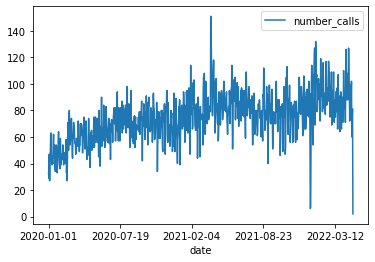

In [41]:
call_dates.plot(x="date", y="number_calls", kind="line")
plt.show()

In [42]:
#make subsets of data by year. first, double check which years data comes from
crisis['call_year'].value_counts()

2021    29493
2020    23383
2022    10648
nan         2
Name: call_year, dtype: int64

In [43]:
#create 2020 filter
filter2020 = crisis['call_year'].isin(['2020'])

#make new dataframe based on filter
calls2020 = crisis[filter2020]
calls2020.head()

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
40143      82699332        Crisis                   NaN  2020-12-31 23:40:00   
40144      82689642        Crisis                   NaN  2020-12-31 22:31:00   
40145      82688780        Crisis                   NaN  2020-12-31 21:32:00   
40146      82688656        Crisis                   NaN  2020-12-31 21:27:00   
40147      82688670        Crisis                   NaN  2020-12-31 21:19:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
40143  2020-12-31 23:53:00         13   3769693         116928   
40144  2020-12-31 23:00:00         29        -1         136748   
40145  2020-12-31 22:02:00         30        -1         139345   
40146  2020-12-31 21:43:00         16        -1         136748   
40147  2020-12-31 21:26:00          7        -1         139345   

1     PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
40143  Kimberly Ligon         NaN       NaN        NaN            NaN   
40144   Lisa Crawford         NaN       NaN        NaN            NaN   
40145     Andrea Word         NaN       NaN        NaN            NaN   
40146   Lisa Crawford         NaN       NaN        NaN            NaN   
40147     Andrea Word         NaN       NaN        NaN            NaN   

1     WasPrankCall WasSilentCall GeoCode GeoAssignment CountyName  \
40143          NaN           NaN     NaN           NaN        NaN   
40144          NaN           NaN     NaN           NaN        NaN   
40145          NaN           NaN     NaN           NaN        NaN   
40146          NaN           NaN     NaN           NaN        NaN   
40147          NaN           NaN     NaN           NaN        NaN   

1     StateProvince CountryName PostalCode CensusDivision CensusTrack  \
40143           NaN         NaN        NaN            NaN         NaN   
40144           NaN         NaN        NaN            NaN         NaN   
40145           NaN         NaN        NaN            NaN         NaN   
40146           NaN         NaN        NaN            NaN         NaN   
40147           NaN         NaN      98271            NaN         NaN   

1     CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
40143                 NaN       NaN            NaN       NaN            NaN   
40144                 NaN       NaN            NaN       NaN            NaN   
40145                 NaN       NaN            NaN       NaN            NaN   
40146                 NaN       NaN            NaN       NaN            NaN   
40147                 NaN       NaN            NaN       NaN            NaN   

1     ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
40143                    NaN                   NaN               NaN   
40144                    NaN                   NaN               NaN   
40145                    NaN                   NaN               NaN   
40146                    NaN                   NaN               NaN   
40147                    NaN                   NaN               NaN   

1     ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
40143            NaN              NaN                      TN   
40144            NaN              NaN                     NaN   
40145            NaN              NaN                     NaN   
40146            NaN              NaN                     NaN   
40147            NaN              NaN                      TN   

1     ThirdPartyPostalCode                                          Narrative  \
40143                  NaN  S-Caller states he is not optimistic about the...   
40144                  NaN  S: Caller says he is not suicidal and says he ...   
40145                  NaN  S:Caller stated that she has a daughter that s...   
40146                  NaN  S: Caller says she is being beat to death and ...   
40147                  NaN  S: Caller stated that adult protective service...   

1                                      Volu

In [44]:
#create 2021 filter
filter2021 = crisis['call_year'].isin(['2021'])

#make new dataframe based on filter
calls2021 = crisis[filter2021]
calls2021.head()

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
10650      96627022        Crisis                   NaN  2021-12-31 23:35:00   
10651      96626934        Crisis                   NaN  2021-12-31 23:29:00   
10652      96626654        Crisis                   NaN  2021-12-31 23:07:00   
10653      96626370        Crisis                   NaN  2021-12-31 22:45:00   
10654      96625909        Crisis                   NaN  2021-12-31 22:15:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
10650  2021-12-31 23:58:00         23        -1         136748   
10651  2021-12-31 23:35:00          6        -1         136748   
10652  2021-12-31 23:28:00         21   1030262         136748   
10653  2021-12-31 22:55:00         10   2479348         136748   
10654  2021-12-31 22:44:00         29        -1         136748   

1     PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
10650   Lisa Crawford         NaN       NaN        NaN            NaN   
10651   Lisa Crawford         NaN       NaN        NaN            NaN   
10652   Lisa Crawford         NaN       NaN        NaN            NaN   
10653   Lisa Crawford         NaN       NaN        NaN            NaN   
10654   Lisa Crawford         NaN       NaN        NaN            NaN   

1     WasPrankCall WasSilentCall GeoCode GeoAssignment CountyName  \
10650          NaN           NaN     NaN           NaN        NaN   
10651          NaN           NaN     NaN           NaN        NaN   
10652          NaN           NaN     NaN           NaN        NaN   
10653          NaN           NaN     NaN           NaN        NaN   
10654          NaN           NaN     NaN           NaN        NaN   

1     StateProvince CountryName PostalCode CensusDivision CensusTrack  \
10650           NaN         NaN        NaN            NaN         NaN   
10651           NaN         NaN      37211            NaN         NaN   
10652           NaN         NaN        NaN            NaN         NaN   
10653           NaN         NaN      37098            NaN         NaN   
10654           NaN         NaN        NaN            NaN         NaN   

1     CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
10650                 NaN       NaN            NaN       NaN            NaN   
10651                 NaN       NaN            NaN       NaN            NaN   
10652                 NaN       NaN            NaN       NaN            NaN   
10653                 NaN       NaN            NaN       NaN            NaN   
10654                 NaN       NaN            NaN       NaN            NaN   

1     ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
10650                    NaN                   NaN               NaN   
10651                    NaN                   NaN               NaN   
10652                    NaN                   NaN               NaN   
10653                    NaN                   NaN               NaN   
10654                    NaN                   NaN               NaN   

1     ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
10650            NaN              NaN                     NaN   
10651            NaN              NaN                      TN   
10652            NaN              NaN                      TN   
10653            NaN              NaN                      TN   
10654            NaN              NaN                     NaN   

1     ThirdPartyPostalCode                                          Narrative  \
10650                  NaN  S: Caller says that he is lonely, he broke up ...   
10651                  NaN  S: Caller says he is disappointed because his ...   
10652                  NaN  S: Caller stated that she is tired and had to ...   
10653                  NaN  S: Caller stated that she fell and broke her r...   
10654                  NaN  S: Caller says Donald Trump effects are causin...   

1     VolunteerComments                    

In [45]:
#create 2022 filter
filter2022 = crisis['call_year'].isin(['2022'])

#make new dataframe based on filter
calls2022 = crisis[filter2022]
calls2022.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
1   101384892.0    Crisis v.2                   NaN  2022-04-30 23:19:00   
2   101384348.0    Crisis v.2                   NaN  2022-04-30 22:46:00   
3   101383635.0    Crisis v.2                   NaN  2022-04-30 22:03:00   
4   101383441.0    Crisis v.2                   NaN  2022-04-30 21:52:00   
5   101383414.0    Crisis v.2                   NaN  2022-04-30 21:50:00   

1   CallDateAndTimeEnd CallLength  CallerNum PhoneWorkerNum  PhoneWorkerName  \
1  2022-04-30 23:27:00        8.0  1025380.0        55599.0  Darren Anderson   
2  2022-04-30 23:13:00       27.0       -1.0        55599.0  Darren Anderson   
3  2022-04-30 22:27:00       24.0       -1.0       169061.0   Tandra Freeman   
4  2022-04-30 22:15:00       23.0       -1.0       170047.0       Jane Davis   
5  2022-04-30 21:51:00        1.0       -1.0       169061.0   Tandra Freeman   

1 WasRealCall WasHangup WasSexCall WasWrongNumber WasPrankCall WasSilentCall  \
1         NaN       NaN        NaN            NaN          NaN           NaN   
2         NaN       NaN        NaN            NaN          NaN           NaN   
3         NaN       NaN        NaN            NaN          NaN           NaN   
4         NaN       NaN        NaN            NaN          NaN           NaN   
5         NaN       NaN        NaN            NaN          NaN           NaN   

1 GeoCode GeoAssignment CountyName StateProvince    CountryName PostalCode  \
1     NaN           NaN  Robertson            TN  United States        NaN   
2     NaN           NaN      Smith            TN  United States    38563.0   
3     NaN           NaN        NaN           NaN            NaN        NaN   
4     NaN           NaN        NaN           NaN            NaN        NaN   
5     NaN           NaN        NaN           NaN            NaN        NaN   

1 CensusDivision CensusTrack CensusReportingArea 211Region PhoneExtension  \
1            NaN         NaN                 NaN       NaN            NaN   
2            NaN         NaN                 NaN       NaN            NaN   
3            NaN         NaN                 NaN       NaN            NaN   
4            NaN         NaN                 NaN       NaN            NaN   
5            NaN         NaN                 NaN       NaN            NaN   

1 PhoneType ThirdPartyName ThirdPartyOrganization ThirdPartyPhoneNumber  \
1       NaN            NaN                    NaN                   NaN   
2       NaN            NaN                    NaN                   NaN   
3       NaN            NaN                    NaN                   NaN   
4       NaN            NaN                    NaN                   NaN   
5       NaN            NaN                    NaN                   NaN   

1 ThirdPartyAddress ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
1               NaN            NaN              NaN                     NaN   
2               NaN            NaN              NaN                     NaN   
3               NaN            NaN              NaN                     NaN   
4               NaN            NaN              NaN                     NaN   
5               NaN            NaN              NaN                     NaN   

1 ThirdPartyPostalCode Narrative  \
1                  NaN       NaN   
2                  NaN       NaN   
3                  NaN       NaN   
4                  NaN       NaN   
5                  NaN       NaN   

1                                  VolunteerComments  \
1  Client said she broke her wrist while coming i...   
2  Caller discussed having PTSD from complicated ...   
3  Caller has a conflict with family and friends....   
4  woman is disabled and has a TBI - thinks she c...   
5                                                NaN   

1                                 Feedback CallersFeedback TextField2  \
1                                      NaN             NaN        NaN   
2  (No feedback was nee

In [46]:
#clearly that's way too many data points, so let's look at the top 50 days
#call_dates_top50 = 

## 2. Analyze trends in call content by looking for which issues are most frequent and what is the average count of issues per call.

In [47]:
#first, let's try to isolate columns with "CRISIS" in the title
#(based on README, that's what we're looking for)
#https://towardsdatascience.com/interesting-ways-to-select-pandas-dataframe-columns-b29b82bbfb33
#(at that link, see section on selecting columns based on substring)

crisis_issues = crisis.loc[:,['CRISIS Issues' in i for i in crisis.columns]]
crisis_issues.head()

1 CRISIS Issues - Abusive Behavior  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                              NaN   

1 CRISIS Issues - Call Problems (specify at least 2)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

1 CRISIS Issues - Emotional State CRISIS Issues - Financial/Basic Needs  \
0                             NaN                                   NaN   
1                             NaN                                   NaN   
2                             NaN                                   NaN   
3                             NaN                                   NaN   
4                             NaN                                   NaN   

1 CRISIS Issues - Health/Physical CRISIS Issues - Homicide  \
0                             NaN                      NaN   
1                             NaN                      NaN   
2                             NaN                      NaN   
3                             NaN                      NaN   
4                             NaN                      NaN   

1 CRISIS Issues - Information or Services Needed  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

1 CRISIS Issues - Mental Health CRISIS Issues - No Issue Call  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

1 CRISIS Issues - Other Description CRISIS Issues - Relationships  \
0                               NaN                           NaN   
1                               NaN                           NaN   
2                               NaN                           NaN   
3                               NaN                           NaN   
4                               NaN                           NaN   

1 CRISIS Issues - Substances CRISIS Issues - Suicide  
0                        NaN                     NaN  
1                        NaN                     NaN  
2                        NaN                     NaN  
3                        NaN                     NaN  
4                        NaN                     NaN

In [48]:
#how many non-NAN values per column? and make it a dataframe
crisis_notes = crisis_issues.count().to_frame().reset_index()

#rename columns
crisis_notes.columns = ['crisis_issue', 'call_volume']

#sort values by call_volume
crisis_notes = crisis_notes.sort_values(by='call_volume', ascending=False)

crisis_notes.head(20)

crisis_issue  call_volume
2                     CRISIS Issues - Emotional State        35688
10                      CRISIS Issues - Relationships        23180
7                       CRISIS Issues - Mental Health        18437
4                     CRISIS Issues - Health/Physical         4842
12                            CRISIS Issues - Suicide         4359
9                   CRISIS Issues - Other Description         3106
11                         CRISIS Issues - Substances         2599
0                    CRISIS Issues - Abusive Behavior         2046
3               CRISIS Issues - Financial/Basic Needs         2010
6      CRISIS Issues - Information or Services Needed         1833
8                       CRISIS Issues - No Issue Call         1519
5                            CRISIS Issues - Homicide           46
1   CRISIS Issues - Call Problems (specify at leas...            0

## 3. Assess regional and demographic trends in call content and call volume.

In [49]:
crisis.head(10)

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0                         NaN                   NaN                  nan   
1   101384892.0    Crisis v.2                   NaN  2022-04-30 23:19:00   
2   101384348.0    Crisis v.2                   NaN  2022-04-30 22:46:00   
3   101383635.0    Crisis v.2                   NaN  2022-04-30 22:03:00   
4   101383441.0    Crisis v.2                   NaN  2022-04-30 21:52:00   
5   101383414.0    Crisis v.2                   NaN  2022-04-30 21:50:00   
6   101383042.0    Crisis v.2                   NaN  2022-04-30 21:30:00   
7   101382889.0    Crisis v.2                   NaN  2022-04-30 21:19:00   
8   101382710.0    Crisis v.2                   NaN  2022-04-30 21:13:00   
9   101382566.0    Crisis v.2                   NaN  2022-04-30 21:05:00   

1   CallDateAndTimeEnd CallLength  CallerNum PhoneWorkerNum  PhoneWorkerName  \
0                  NaN        NaN        NaN            NaN              NaN   
1  2022-04-30 23:27:00        8.0  1025380.0        55599.0  Darren Anderson   
2  2022-04-30 23:13:00       27.0       -1.0        55599.0  Darren Anderson   
3  2022-04-30 22:27:00       24.0       -1.0       169061.0   Tandra Freeman   
4  2022-04-30 22:15:00       23.0       -1.0       170047.0       Jane Davis   
5  2022-04-30 21:51:00        1.0       -1.0       169061.0   Tandra Freeman   
6  2022-04-30 21:31:00        1.0       -1.0       170047.0       Jane Davis   
7  2022-04-30 21:28:00        9.0       -1.0       170047.0       Jane Davis   
8  2022-04-30 21:27:00       14.0  2479348.0       169061.0   Tandra Freeman   
9  2022-04-30 21:06:00        1.0  2479348.0       169061.0   Tandra Freeman   

1 WasRealCall WasHangup WasSexCall WasWrongNumber WasPrankCall WasSilentCall  \
0         NaN       NaN        NaN            NaN          NaN           NaN   
1         NaN       NaN        NaN            NaN          NaN           NaN   
2         NaN       NaN        NaN            NaN          NaN           NaN   
3         NaN       NaN        NaN            NaN          NaN           NaN   
4         NaN       NaN        NaN            NaN          NaN           NaN   
5         NaN       NaN        NaN            NaN          NaN           NaN   
6         NaN       NaN        NaN            NaN          NaN           NaN   
7         NaN       NaN        NaN            NaN          NaN           NaN   
8         NaN       NaN        NaN            NaN          NaN           NaN   
9         NaN       NaN        NaN            NaN          NaN           NaN   

1 GeoCode GeoAssignment CountyName StateProvince    CountryName PostalCode  \
0     NaN           NaN        NaN           NaN            NaN        NaN   
1     NaN           NaN  Robertson            TN  United States        NaN   
2     NaN           NaN      Smith            TN  United States    38563.0   
3     NaN           NaN        NaN           NaN            NaN        NaN   
4     NaN           NaN        NaN           NaN            NaN        NaN   
5     NaN           NaN        NaN           NaN            NaN        NaN   
6     NaN           NaN        NaN           NaN            NaN        NaN   
7     NaN           NaN        NaN           NaN            NaN        NaN   
8     NaN           NaN    Hickman            TN  United States        NaN   
9     NaN           NaN    Hickman            TN  United States        NaN   

1 CensusDivision CensusTrack CensusReportingArea 211Region PhoneExtension  \
0            NaN         NaN                 NaN       NaN            NaN   
1            NaN         NaN                 NaN       NaN            NaN   
2            NaN         NaN                 NaN       NaN            NaN   
3            NaN         NaN                 NaN       NaN            NaN   
4            NaN         NaN                 NaN       NaN            NaN   
5            NaN         NaN                 NaN       NaN            NaN   
6  

In [50]:
 crisis['CRISIS Call Information - Phone Line'].value_counts()

Crisis                                  48798
NSPL                                     9279
Crisis Priority                          2083
Crisis Spanish                            166
Redline Call turned into Crisis Call       93
Walk-in                                     6
Name: CRISIS Call Information - Phone Line, dtype: int64

In [51]:
#let's start with regional information
crisis['StateProvince'].value_counts()

TN    4271
CA     168
VA     121
TX      89
WI      86
NJ      76
NY      55
AL      51
FL      30
NV      26
GA      25
KY      24
OK      23
MS      22
OR      19
MD      18
IL      13
RI      12
IN      12
NM      12
SC       9
LA       8
NH       7
MA       7
NC       6
MN       6
KS       5
UT       5
OH       4
WA       4
CO       4
VT       4
MO       4
PA       4
AR       3
ID       2
WV       1
ME       1
AZ       1
CT       1
MI       1
Name: StateProvince, dtype: int64

In [52]:
#if we could find json for these counties, something geospatial could be cool
crisis['CountyName'].value_counts()

Davidson         1715
Sumner            252
Shelby            197
Knox              195
Robertson         161
                 ... 
Berkeley            1
Windsor             1
Saint Tammany       1
Norton City         1
Tompkins            1
Name: CountyName, Length: 200, dtype: int64

In [53]:
#if we could find json for these zipcodes, something geospatial could be cool
crisis['PostalCode'].value_counts()

37075.0    1453
37115.0    1295
38012.0    1125
37211.0     945
37138.0     927
           ... 
11206.0       1
75007.0       1
28105.0       1
79424.0       1
77024.0       1
Name: PostalCode, Length: 1195, dtype: int64

In [54]:
#looking into demographics now
demographics = crisis.loc[:,['Demographics' in i for i in crisis.columns]]
demographics.head(20)

1  HOM AX Demographics - Occupation SUI AX Demographics - Name of Third Party  \
0                               NaN                                       NaN   
1                               NaN                                       NaN   
2                               NaN                                       NaN   
3                               NaN                                       NaN   
4                               NaN                                       NaN   
5                               NaN                                       NaN   
6                               NaN                                       NaN   
7                               NaN                                       NaN   
8                               NaN                                       NaN   
9                               NaN                                       NaN   
10                              NaN                                       NaN   
11                              NaN                                       NaN   
12                              NaN                                       NaN   
13                              NaN                                       NaN   
14                              NaN                                       NaN   
15                              NaN                                       NaN   
16                              NaN                                       NaN   
17                              NaN                                       NaN   
18                              NaN                                       NaN   
19                              NaN                                       NaN   

1  SUI AX Demographics - Occupation CRISIS Demographics - Age  \
0                               NaN                       NaN   
1                               NaN                     56-70   
2                               NaN                       NaN   
3                               NaN                       NaN   
4                               NaN                       NaN   
5                               NaN                       NaN   
6                               NaN                       NaN   
7                               NaN                       NaN   
8                               NaN                     56-70   
9                               NaN                     56-70   
10                              NaN                       NaN   
11                              NaN                     25-30   
12                              NaN                     31-40   
13                              NaN                       NaN   
14                              NaN                       NaN   
15                              NaN                       NaN   
16                              NaN                       NaN   
17                              NaN                       NaN   
18                              NaN                       NaN   
19                              NaN                       NaN   

1  CRISIS Demographics - Gender Identity CRISIS Demographics - Military  \
0                                    NaN                            NaN   
1                                 Female            N/A (did not serve)   
2                                    NaN                        Unknown   
3                                    NaN                        Unknown   
4                                 Female                        Unknown   
5                                    NaN                            NaN   
6                                    NaN                            NaN   
7                                   Male                        Unknown   
8                                 Female            N/A (did not serve)   
9                                 Female            N/A (did not serve)   
10                                   NaN                            NaN   
11                              

In [86]:
#let's add in some date & regional information as well
demographics['call_year'] = crisis['call_year']
demographics['call_month'] = crisis['call_month']
demographics['call_source'] = crisis['CRISIS Call Information - Phone Line']
demographics['zipcode']
demographics.head()

/var/folders/kz/f2x26zgj2q5_y3k46h56qkw80000gn/T/ipykernel_2920/3583003930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics['call_year'] = crisis['call_year'].values


In [55]:
#was getting an error about datetime when running categorical associations below
#I think it's because one of the age categories is being read as datetime (7-12)
#let's try converting to str and see if that helps
demographics['CRISIS Demographics - Age'] = demographics['CRISIS Demographics - Age'].astype('str')

/var/folders/kz/f2x26zgj2q5_y3k46h56qkw80000gn/T/ipykernel_2920/2334435424.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics['CRISIS Demographics - Age'] = demographics['CRISIS Demographics - Age'].astype('str')


In [56]:
#check categorical variables
#https://blog.knoldus.com/how-to-find-correlation-value-of-categorical-variables/
categorical_features=identify_nominal_columns(demographics)
categorical_features

['HOM AX Demographics - Occupation',
 'SUI AX Demographics - Name of Third Party',
 'SUI AX Demographics - Occupation',
 'CRISIS Demographics - Age',
 'CRISIS Demographics - Gender Identity',
 'CRISIS Demographics - Military',
 'CRISIS Demographics - Race/Ethnicity',
 'HOM AX Demographics - Age',
 'HOM AX Demographics - Education Level',
 'HOM AX Demographics - Ethnicity',
 'HOM AX Demographics - Gender',
 'HOM AX Demographics - Has a disability?',
 'HOM AX Demographics - Homeless?',
 'HOM AX Demographics - Income?',
 'HOM AX Demographics - Is working?',
 'HOM AX Demographics - Marital Status',
 'HOM AX Demographics - Military',
 'HOM AX Third-Party Risk Assessment Demographics - Does this risk assesment have different demographics than the caller? (Third-party Call)',
 'SUI AX Demographics -  Income Source(s)',
 'SUI AX Demographics - Age',
 'SUI AX Demographics - Education Level',
 'SUI AX Demographics - Ethnicity',
 'SUI AX Demographics - Gender',
 'SUI AX Demographics - Has a disab

In [57]:
#to make correlation table more manageable, let's drop columns w/ less than 1000 values
demographics1000 = demographics.dropna(thresh=1000, axis=1)
demographics1000.head()

1 CRISIS Demographics - Age CRISIS Demographics - Gender Identity  \
0                       nan                                   NaN   
1                     56-70                                Female   
2                       nan                                   NaN   
3                       nan                                   NaN   
4                       nan                                Female   

1 CRISIS Demographics - Military CRISIS Demographics - Race/Ethnicity  \
0                            NaN                                  NaN   
1            N/A (did not serve)                                  NaN   
2                        Unknown                                  NaN   
3                        Unknown                            Caucasian   
4                        Unknown                                  NaN   

1 CRISIS Demographics - Occupation CRISIS Demographics - Education Level  \
0                              NaN                                   NaN   
1                              NaN                                   NaN   
2                              NaN                                   NaN   
3                              NaN                                   NaN   
4                              NaN                                   NaN   

1 CRISIS Demographics - Ethnicity CRISIS Demographics - Has a disability?  \
0                             NaN                                     NaN   
1                             NaN                                     NaN   
2                             NaN                                     NaN   
3                             NaN                                     NaN   
4                             NaN                                     NaN   

1 CRISIS Demographics - Homeless? CRISIS Demographics - Income  \
0                             NaN                          NaN   
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          NaN   
4                             NaN                          NaN   

1 CRISIS Demographics - Marital Status  
0                                  NaN  
1                                  NaN  
2                                  NaN  
3                                  NaN  
4                                  NaN

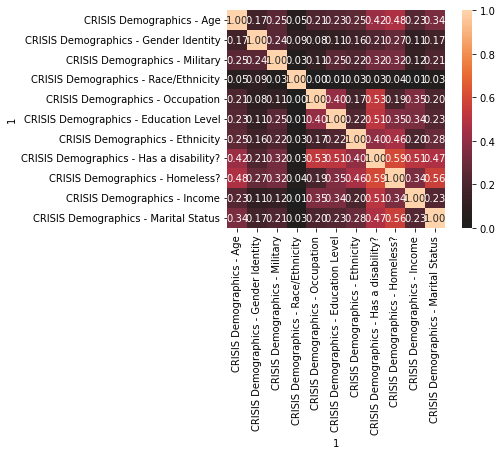

{'corr': 1                                        CRISIS Demographics - Age  \
 1                                                                    
 CRISIS Demographics - Age                                 1.000000   
 CRISIS Demographics - Gender Identity                     0.166472   
 CRISIS Demographics - Military                            0.247138   
 CRISIS Demographics - Race/Ethnicity                      0.047530   
 CRISIS Demographics - Occupation                          0.207739   
 CRISIS Demographics - Education Level                     0.232424   
 CRISIS Demographics - Ethnicity                           0.254957   
 CRISIS Demographics - Has a disability?                   0.421185   
 CRISIS Demographics - Homeless?                           0.475202   
 CRISIS Demographics - Income                              0.230956   
 CRISIS Demographics - Marital Status                      0.343313   
 
 1                                        CRISIS Demographics - Gen

In [80]:
#as expected, all demographic variables are categorical
#https://blog.knoldus.com/how-to-find-correlation-value-of-categorical-variables/
associations(demographics1000, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)

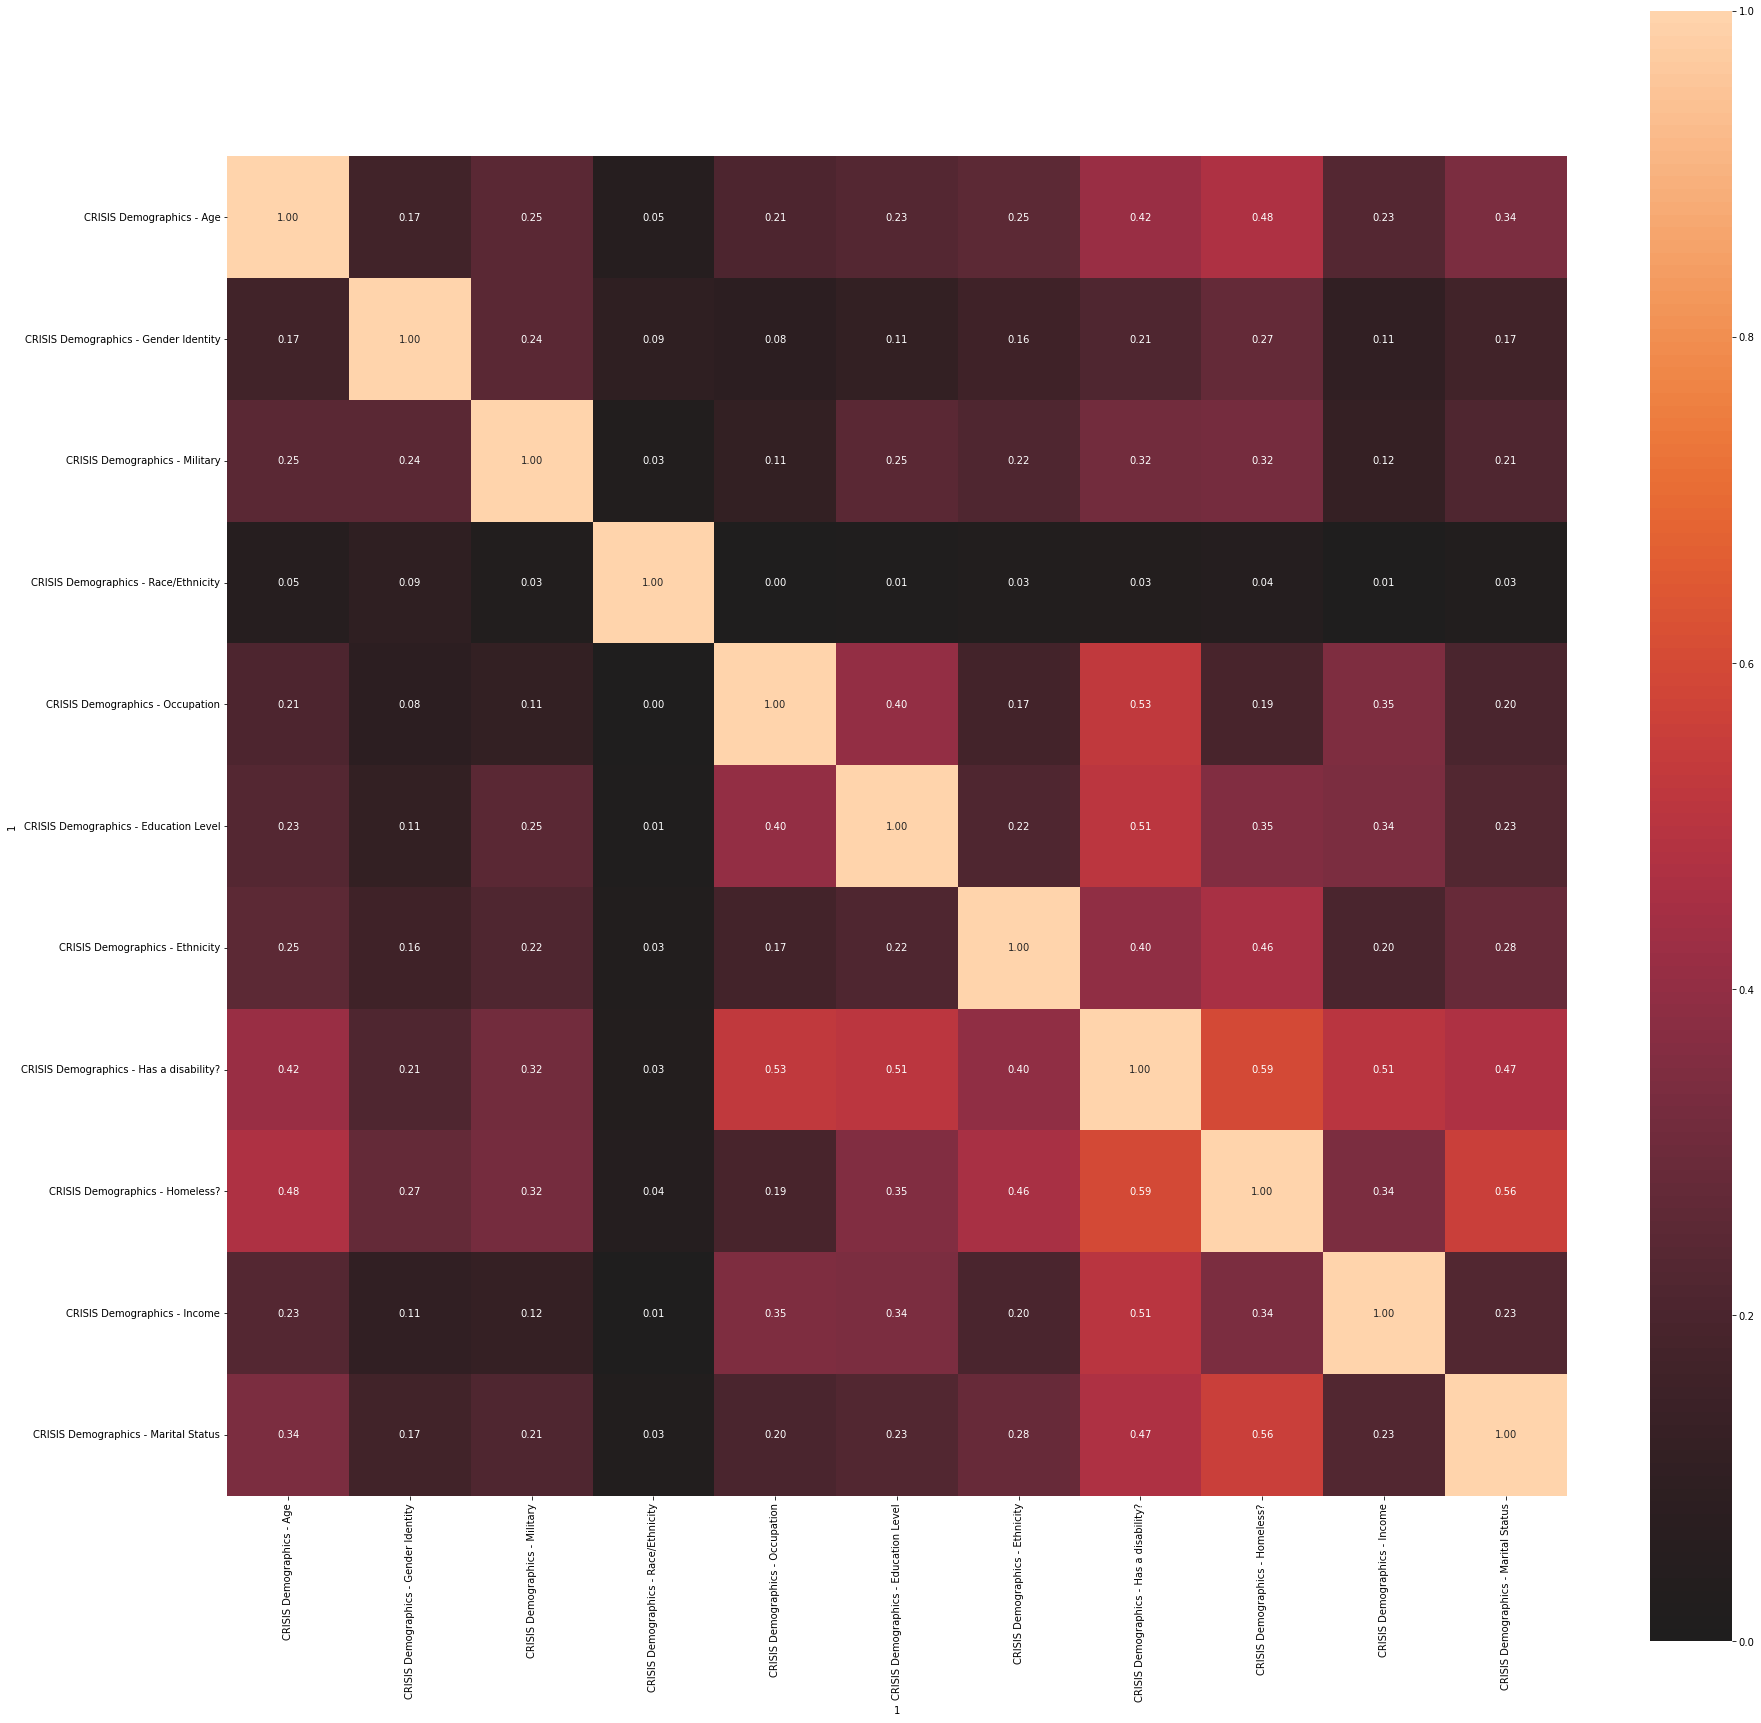

In [81]:
#https://blog.knoldus.com/how-to-find-correlation-value-of-categorical-variables/
complete_correlation= associations(demographics1000, filename= 'complete_correlation.png', figsize=(30,30))

In [82]:
#https://blog.knoldus.com/how-to-find-correlation-value-of-categorical-variables/
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/var/folders/kz/f2x26zgj2q5_y3k46h56qkw80000gn/T/ipykernel_2920/949571364.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


In [61]:
#which demographic factors have the most data collected? (analysis will be best w/ more data)
demographics.count()

1
HOM AX Demographics - Occupation                                                                                                                         2
SUI AX Demographics - Name of Third Party                                                                                                                5
SUI AX Demographics - Occupation                                                                                                                         0
CRISIS Demographics - Age                                                                                                                            63526
CRISIS Demographics - Gender Identity                                                                                                                41820
CRISIS Demographics - Military                                                                                                                       54543
CRISIS Demographics - Race/Ethnicity                                

In [62]:
#would be interesting to compare whether callers were suicidal to see if there's a relationship
demographics['CRISIS Demographics - Marital Status'].value_counts()

Single          8478
Divorced        5310
Separated        786
Married          740
Widowed          135
Cohabitating      57
Engaged           39
Name: CRISIS Demographics - Marital Status, dtype: int64

In [63]:
calls2020['CRISIS Demographics - Marital Status'].value_counts()

Single          4086
Divorced        2678
Married          338
Separated        207
Widowed           65
Cohabitating      22
Engaged           13
Name: CRISIS Demographics - Marital Status, dtype: int64

In [64]:
#more people separated than married than 2020 - maybe due to COVID?
calls2021['CRISIS Demographics - Marital Status'].value_counts()

Single          4392
Divorced        2632
Separated        579
Married          402
Widowed           70
Cohabitating      35
Engaged           26
Name: CRISIS Demographics - Marital Status, dtype: int64

In [65]:
calls2022['CRISIS Demographics - Marital Status'].value_counts()

Series([], Name: CRISIS Demographics - Marital Status, dtype: int64)

In [66]:
#interesting trends... would need to see how many are for repeat callers
demographics['CRISIS Demographics - Occupation'].value_counts()

Works at Goodwill                     662
News Anchor                           419
Construction Worker                   327
bagger at Kroger                      191
Substitute Teacher                    167
                                     ... 
Factory worker                          1
Sergeant                                1
Retired nondenominational preacher      1
Unemployed                              1
Caregiver at a Nursing Home             1
Name: CRISIS Demographics - Occupation, Length: 89, dtype: int64

In [67]:
demographics['CRISIS Demographics - Military'].value_counts()

Unknown                            34197
N/A (did not serve)                18514
Veteran                             1583
Family of Military                   129
Active Duty                           79
3rd Party Calling about Veteran       26
Reserves/National Guard               15
Name: CRISIS Demographics - Military, dtype: int64

In [68]:
demographics['CRISIS Demographics - Gender Identity'].value_counts()

Female                                    23612
Male                                      17955
Transgender                                  97
Unidentified                                 94
Transgender Female                           20
Genderqueer                                  11
Transgender Male                             10
Gender Unknown                               10
Non sure gender identity (questioning)        5
Transgender (non-specified)                   4
Non-Binary                                    2
Name: CRISIS Demographics - Gender Identity, dtype: int64

In [69]:
#female to male ratio slowly shrinks with time
crisis.groupby('call_year')['CRISIS Demographics - Gender Identity'].value_counts()

call_year  CRISIS Demographics - Gender Identity 
2020       Female                                     8811
           Male                                       5692
           Unidentified                                 25
           Transgender                                  17
           Genderqueer                                   1
2021       Female                                    10535
           Male                                       8520
           Transgender                                  80
           Unidentified                                 69
           Genderqueer                                  10
2022       Female                                     4266
           Male                                       3743
           Transgender Female                           20
           Gender Unknown                               10
           Transgender Male                             10
           Non sure gender identity (questioning)        5
      

In [70]:
demographics['CRISIS Demographics - Age'].value_counts()

nan                    41465
56-70                   8449
41-55                   6539
31-40                   2649
25-30                   2252
18-24                   1186
13-17                    658
70-85                    233
2022-07-12 00:00:00       86
85+                        8
0-6                        1
Name: CRISIS Demographics - Age, dtype: int64

In [71]:
calls2020['CRISIS Demographics - Age'].value_counts()

56-70                  3212
41-55                  3052
31-40                   920
25-30                   636
18-24                   464
13-17                   267
70-85                    98
2022-07-12 00:00:00      33
85+                       1
Name: CRISIS Demographics - Age, dtype: int64

In [72]:
#wanted to see if there was a way to get value counts by percentage and there IS!
#https://stackoverflow.com/questions/14281871/given-a-pandas-series-that-represents-frequencies-of-a-value-how-can-i-turn-tho
calls2020['CRISIS Demographics - Age'].value_counts(normalize=True)

56-70                  0.369918
41-55                  0.351491
31-40                  0.105954
25-30                  0.073247
18-24                  0.053438
13-17                  0.030750
70-85                  0.011286
2022-07-12 00:00:00    0.003801
85+                    0.000115
Name: CRISIS Demographics - Age, dtype: float64

In [73]:
#caitlyn b also told me there is a way to "group by" with values counts! exciting.. let's try
crisis.groupby('call_year')['CRISIS Demographics - Age'].value_counts()

call_year  CRISIS Demographics - Age
2020       56-70                        3212
           41-55                        3052
           31-40                         920
           25-30                         636
           18-24                         464
           13-17                         267
           70-85                          98
           2022-07-12 00:00:00            33
           85+                             1
2021       56-70                        3920
           41-55                        2736
           31-40                        1210
           25-30                        1133
           18-24                         505
           13-17                         266
           70-85                         108
           2022-07-12 00:00:00            34
           85+                             6
2022       56-70                        1317
           41-55                         751
           31-40                         519
           25-30  

In [74]:
crisis.groupby('CRISIS Demographics - Age')['CRISIS Demographics - Gender Identity'].value_counts()

CRISIS Demographics - Age  CRISIS Demographics - Gender Identity
2022-07-12 00:00:00        Female                                     42
                           Male                                       19
                           Transgender                                 2
                           Transgender (non-specified)                 2
                           Unidentified                                1
0-6                        Female                                      1
13-17                      Female                                    400
                           Male                                      145
                           Transgender                                19
                           Unidentified                                2
18-24                      Female                                    564
                           Male                                      517
                           Transgender                     

In [75]:
demographics['CRISIS Demographics - Race/Ethnicity'].value_counts()

Caucasian               781
African-American        268
Asian                    44
Hispanic/Latino          19
Unidentified/unknown     10
Multiracial               9
Other                     6
Name: CRISIS Demographics - Race/Ethnicity, dtype: int64

In [76]:
demographics['CRISIS Demographics - Has a disability?'].value_counts()

Yes        9785
No          987
Unknown     250
Name: CRISIS Demographics - Has a disability?, dtype: int64

In [77]:
crisis.groupby('call_year')['CRISIS Demographics - Has a disability?'].value_counts(normalize=True)

call_year  CRISIS Demographics - Has a disability?
2020       Yes                                        0.895302
           No                                         0.082454
           Unknown                                    0.022244
2021       Yes                                        0.881006
           No                                         0.095919
           Unknown                                    0.023076
Name: CRISIS Demographics - Has a disability?, dtype: float64

## 4. Determine the count and success rate of imminent risk calls.

In [78]:
#find imminent risk column(s)
imminent = crisis.loc[:,['Imminent' in i for i in crisis.columns]]
imminent.head()

1 Homicide Imminent Risk - Other homicide category:  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

1 CRISIS Imminent Risk - Was contact at imminent risk?  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

1 Homicide Imminent Risk - Please indicate category: (Choose all that apply)  \
0                                                NaN                           
1                                                NaN                           
2                                                NaN                           
3                                                NaN                           
4                                                NaN                           

1 Homicide Imminent Risk - Third party homicide call emergency rescue dispatched?  \
0                                                NaN                                
1                                                NaN                                
2                                                NaN                                
3                                                NaN                                
4                                                NaN                                

1 Homicide Imminent Risk - Was emergency rescue dispatched?  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

1 Homicide Imminent Risk - Was homicidal ideation present?  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

1 Suicide Imminent Risk - Third party suicide call emergency rescue dispatched?  \
0                                                NaN                              
1                                                NaN                              
2                                                NaN                              
3                                                NaN                              
4                                                NaN                              

1 Suicide Imminent Risk - Was emergency rescue dispatched?  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

1 Suicide Imminent Risk - Was suicidal ideation present?   \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

1 CRISIS/LIFELINE Imminent Risk - 2. Was caller at imminent risk for suicide?   \
0                                                NaN                             
1                                                NaN                             
2                                                NaN                             
3        

In [79]:
#find success column(s)
success = crisis.loc[:,['Success' in i for i in crisis.columns]]
success.head()

1 CRISIS Success Story - Does this call have a success story? If so please describe:  \
0                                                NaN                                   
1                                                NaN                                   
2                                                NaN                                   
3                                                NaN                                   
4                                                NaN                                   

1 CRISIS Assessment - Was the outcome of this call Successful or Unsuccessful?  \
0                                                NaN                             
1                                                NaN                             
2                                                NaN                             
3                                                NaN                             
4                                                NaN                             

1 CRISIS Demographics - Was the outcome of this call Successful or Unsuccessful?  \
0                                                NaN                               
1                                                NaN                               
2                                                NaN                               
3                                                NaN                               
4                                                NaN                               

1 CRISIS Successful Outcome - Received debriefing with peer/supervisor?  \
0                                                NaN                      
1                                                NaN                      
2                                                NaN                      
3                                                NaN                      
4                                                NaN                      

1 CRISIS Successful Outcome - Request to review contact with a peer/supervisor  \
0                                                NaN                             
1                                                NaN                             
2                                                NaN                             
3                                                NaN                             
4                                                NaN                             

1 CRISIS Successful Outcome - Successful Outcome  
0                                            NaN  
1                                            NaN  
2                                            NaN  
3                                            NaN  
4                                            NaN